In [37]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import linregress
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore') 

1.	How would you estimate the impact the weather has on Uber pickups?

            a.	Do certain weather conditions lead to an increase or decrease in pickups?

            b.	Are there any correlations between weather variables and pickups?


pickup_dt: Date and time of the data point.

borough: The borough in New York City (e.g., Bronx, Brooklyn, Manhattan, etc.).

pickups: The number of pickups recorded for that hour in the borough.

spd: Speed (assuming it's related to wind speed).

vsb: Visibility (assuming it's related to visibility conditions).

temp: Temperature.

dewp: Dew point.

slp: Sea level pressure.

pcp01: Precipitation in the last hour.

pcp06: Precipitation in the last 6 hours.

pcp24: Precipitation in the last 24 hours.

sd: Snow depth.

hday: A flag or indicator (perhaps for a holiday).

In [38]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("Resources/clean.csv")
df.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
0,2015-01-01 00:00:00,0,January,Bronx,33.0,6.963889,9.113333,0.14037,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
1,2015-01-01 00:00:00,0,January,Brooklyn,517.0,6.963889,9.113333,0.14037,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
2,2015-01-01 00:00:00,0,January,EWR,0.0,6.963889,9.113333,0.14037,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
3,2015-01-01 00:00:00,0,January,Manhattan,1301.0,6.963889,9.113333,0.14037,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
4,2015-01-01 00:00:00,0,January,Queens,243.0,6.963889,9.113333,0.14037,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y


In [39]:
# Calculate correlations
correlations = df[['pickups', 'Wind speed','Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']].corr()
correlations

,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth
pickups,1.000000,0.009729,-0.008434,0.063720,0.040110,-0.015715,0.005005,-0.002847,-0.022945,-0.009663
Wind speed,0.009729,1.000000,0.086184,-0.296150,-0.321628,-0.092750,-0.000354,0.016703,-0.010397,0.097022
Visibility,-0.008434,0.086184,1.000000,0.025191,-0.231300,0.167043,-0.488405,-0.118324,0.000902,-0.047841
Temperature,0.063720,-0.296150,0.025191,1.000000,0.896558,-0.224552,-0.013349,-0.037396,-0.014454,-0.545465
dew point,0.040110,-0.321628,-0.231300,0.896558,1.000000,-0.311165,0.115384,0.013191,0.001475,-0.489290
Sea level pressure,-0.015715,-0.092750,0.167043,-0.224552,-0.311165,1.000000,-0.089750,-0.104911,-0.134677,0.121495
Precipitation 01,0.005005,-0.000354,-0.488405,-0.013349,0.115384,-0.089750,1.000000,0.128065,0.001000,0.000307
Precipitation 06,-0.002847,0.016703,-0.118324,-0.037396,0.013191,-0.104911,0.128065,1.000000,0.251190,0.039902
Precipitation 24,-0.022945,-0.010397,0.000902,-0.014454,0.001475,-0.134677,0.001000,0.251190,1.000000,0.069646
Snow depth,-0.009663,0.097022,-0.047841,-0.545465,-0.489290,0.121495,0.000307,0.039902,0.069646,1.000000


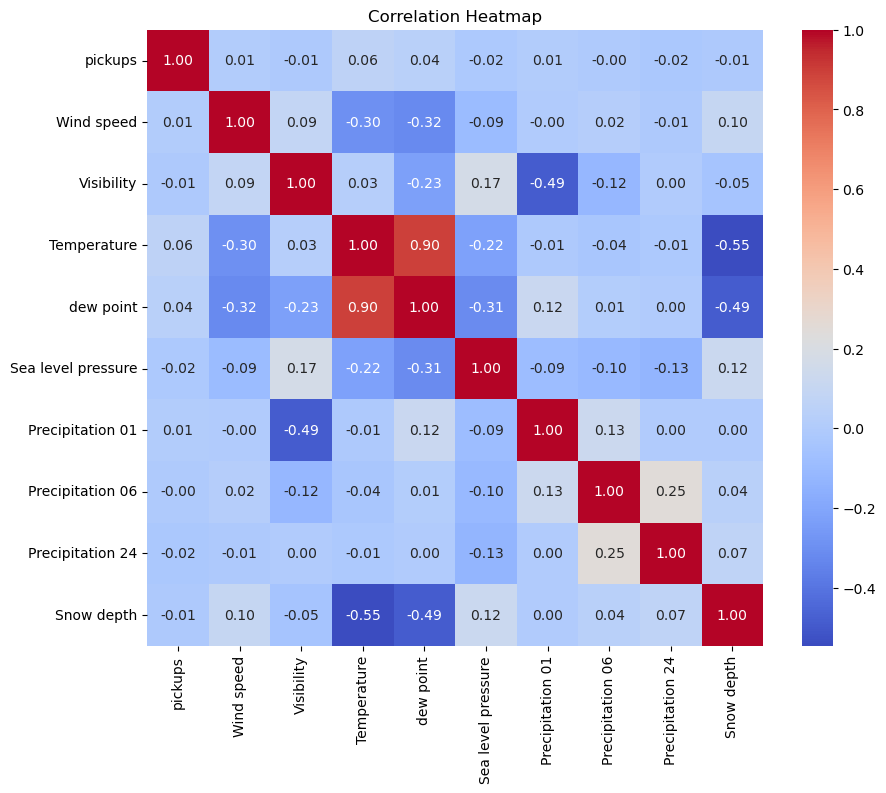

In [40]:
# Create a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

The correlation (r-value) between pickups and the Wind speed is 0.01
The r-squared is: 0.0


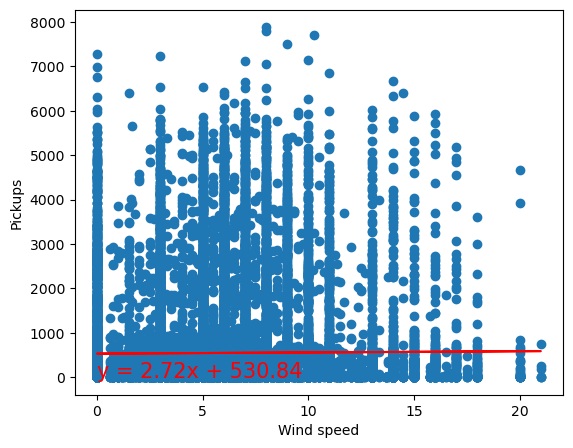

The correlation (r-value) between pickups and the Visibility is -0.01
The r-squared is: 0.0


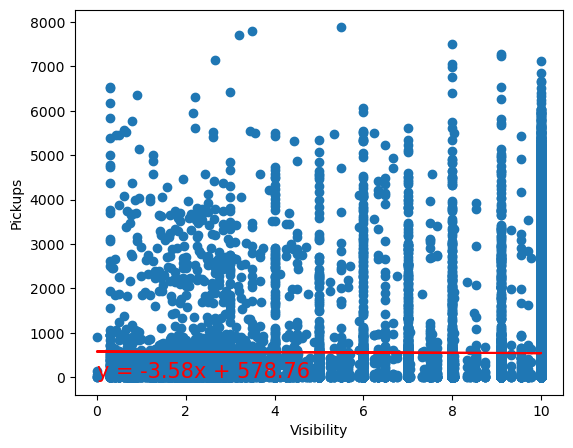

The correlation (r-value) between pickups and the Temperature is 0.06
The r-squared is: 0.0


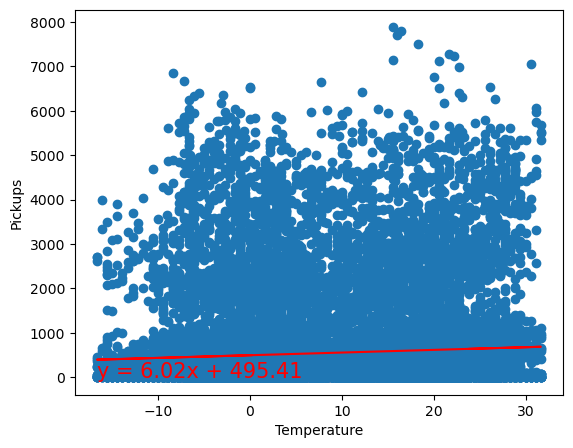

The correlation (r-value) between pickups and the dew point is 0.04
The r-squared is: 0.0


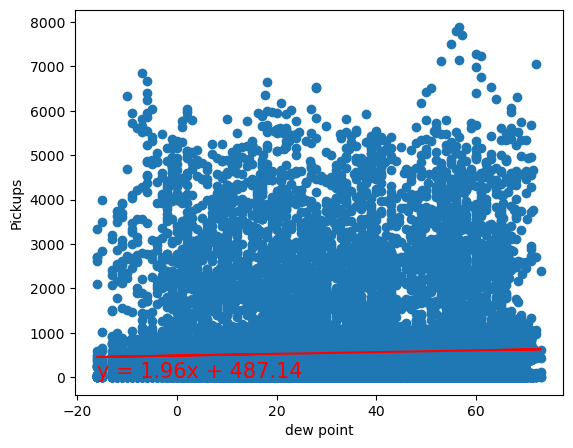

The correlation (r-value) between pickups and the Sea level pressure is -0.02
The r-squared is: 0.0


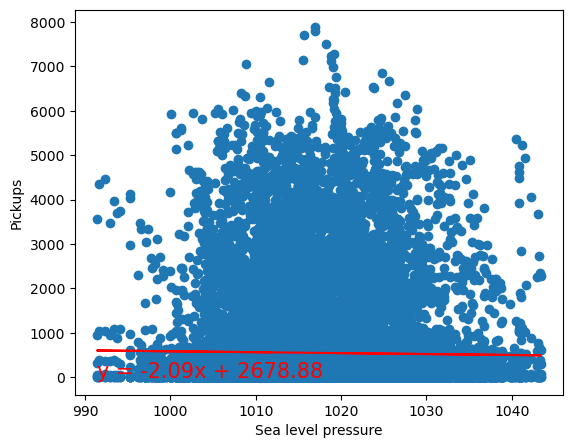

The correlation (r-value) between pickups and the Precipitation 01 is 0.01
The r-squared is: 0.0


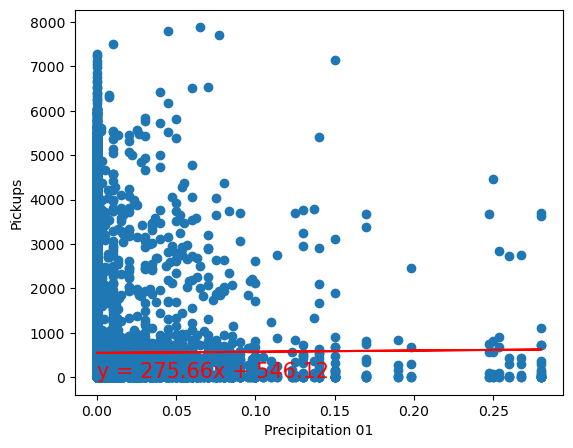

The correlation (r-value) between pickups and the Precipitation 06 is -0.0
The r-squared is: 0.0


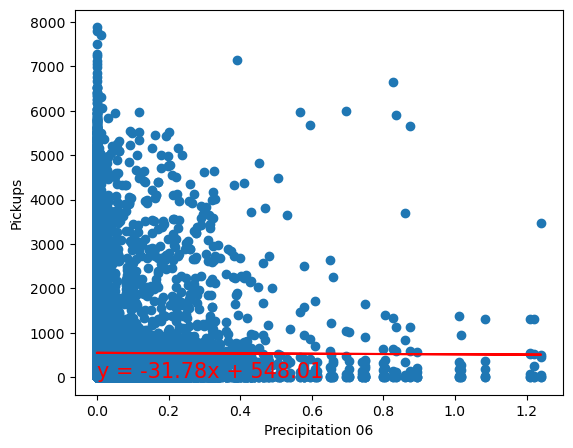

The correlation (r-value) between pickups and the Precipitation 24 is -0.02
The r-squared is: 0.0


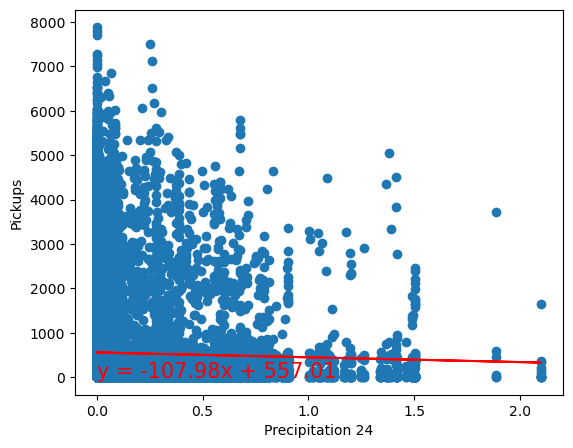

The correlation (r-value) between pickups and the Snow depth is -0.01
The r-squared is: 0.0


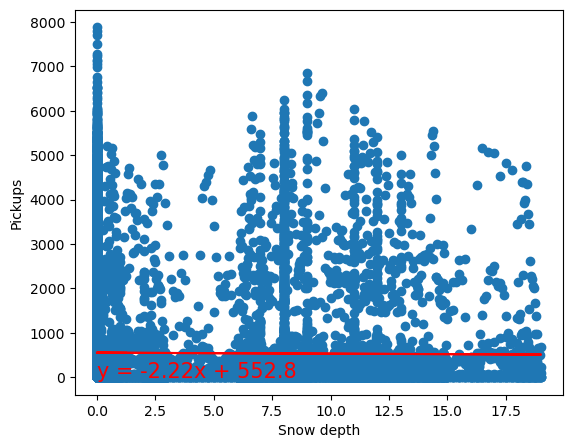

In [41]:
# List of variables for analysis
variable_list = ['Wind speed','Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']

# Iterate through each variable and perform data analysis
for variable in variable_list:
    # Extract 'pickups' data from the DataFrame
    pickups = df['pickups']
    
    # Extract the data for the current variable
    variable_data = df[variable]
    
    # Calculate the correlation (r-value) between 'pickups' and the current variable
    correlation = st.pearsonr(variable_data, pickups)
    
    # Print the correlation coefficient, rounded to two decimal places
    print(f"The correlation (r-value) between pickups and the {variable} is {round(correlation[0], 2)}")
    
    # Create a new matplotlib figure with a specified size
    plt.figure(figsize=(6.3, 5))
    
    # Perform linear regression analysis
    (slope, intercept, rvalue, pvalue, stderr) = linregress(variable_data, pickups)
    
    # Calculate the values predicted by the linear regression model
    regress_values = (variable_data * slope + intercept)
    
    # Create a string representing the equation of the regression line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot of the current variable against 'pickups'
    plt.scatter(variable_data, pickups)
    
    # Plot the regression line in red
    plt.plot(variable_data, regress_values, "r-")
    
    # Annotate the plot with the regression equation
    plt.annotate(line_eq, (min(variable_data), min(pickups)), fontsize=15, color="red")
    
    # Set labels for the y-axis and x-axis
    plt.ylabel("Pickups")
    plt.xlabel(f"{variable}")
    
    # Print the r-squared value (coefficient of determination), rounded to two decimal places
    print(f"The r-squared is: {round(rvalue**2, 2)}")
    
    # Display the plots
    plt.show()

In [57]:
borough_data = df[(df['month'] == "April") & (df['borough'] == "Manhattan") & (df['hour'] == 1)]
borough_data.reset_index(drop=True)


,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
0,2015-04-01 01:00:00,1,April,Manhattan,1014.0,5.5,7.05,2.222222,33.0,1008.6,0.03,0.00,0.230833,0.0,N
1,2015-04-02 01:00:00,1,April,Manhattan,1192.0,0.0,10.00,8.333333,13.0,1022.2,0.00,0.00,0.434167,0.0,N
2,2015-04-03 01:00:00,1,April,Manhattan,2032.0,6.0,10.00,15.000000,29.0,1015.1,0.00,0.00,0.000000,0.0,N
3,2015-04-04 01:00:00,1,April,Manhattan,2126.0,5.0,7.00,16.111111,56.0,1005.7,0.00,0.00,0.000000,0.0,N
4,2015-04-05 01:00:00,1,April,Manhattan,2260.0,13.0,10.00,7.777778,14.0,1019.1,0.00,0.00,0.000000,0.0,N
5,2015-04-06 01:00:00,1,April,Manhattan,501.0,6.0,10.00,12.777778,32.0,1021.9,0.00,0.00,0.000000,0.0,N
6,2015-04-07 01:00:00,1,April,Manhattan,746.0,5.0,10.00,11.666667,39.0,1020.5,0.00,0.00,0.193333,0.0,N
7,2015-04-08 01:00:00,1,April,Manhattan,926.0,7.0,6.00,6.666667,41.0,1026.2,0.00,0.00,0.000000,0.0,N
8,2015-04-09 01:00:00,1,April,Manhattan,1160.0,11.0,10.00,4.444444,31.0,1024.9,0.00,0.00,0.000000,0.0,N
9,2015-04-10 01:00:00,1,April,Manhattan,1726.0,6.5,5.50,5.000000,37.0,1025.6,0.00,0.00,0.045000,0.0,N


In [58]:
boroughs = df['borough'].unique()
months = df['month'].unique()

correlation_list = []
hour = []
borough = []
month = []

for borough_name in boroughs:
    for month_name in months:
        for hour_value in range(24):
            borough_data = df[(df['month'] == month_name) & (df['borough'] == borough_name) & (df['hour'] == hour_value)]
            pickups = borough_data['pickups']
            variable_data = borough_data['Temperature']
            correlation = st.pearsonr(variable_data, pickups)[0]
            correlation_list.append(correlation)
            hour.append(hour_value)
            borough.append(borough_name)
            month.append(month_name)

corr_df = pd.DataFrame({"corr": correlation_list, "hour": hour, "borough": borough, "month": month})
corr_df

,corr,hour,borough,month
0,-0.065659,0,Bronx,January
1,-0.073465,1,Bronx,January
2,0.076039,2,Bronx,January
3,-0.004802,3,Bronx,January
4,0.010235,4,Bronx,January
...,...,...,...,...
859,0.112917,19,Staten Island,June
860,0.227972,20,Staten Island,June
861,0.168187,21,Staten Island,June
862,-0.003286,22,Staten Island,June


In [45]:
# Find the first maximum correlation
max_corr = corr_df['corr'].max()

# Find the first minimum correlation
min_corr = corr_df['corr'].min()

# Find the corresponding rows for the first maximum and minimum correlations
first_max_corr_row = corr_df[corr_df['corr'] == max_corr]
first_min_corr_row = corr_df[corr_df['corr'] == min_corr]

# Print the results
print("Most Positive Correlation:")
print(first_max_corr_row)

print("\nMost Negative Correlation:")
print(first_min_corr_row)

Most Positive Correlation:
         corr  hour borough    month
599  0.431722    23  Queens  January

Most Negative Correlation:
         corr  hour    borough     month
467 -0.695821    11  Manhattan  February


The correlation (r-value) between pickups and the Temperature is -0.7
The r-squared is: 0.48


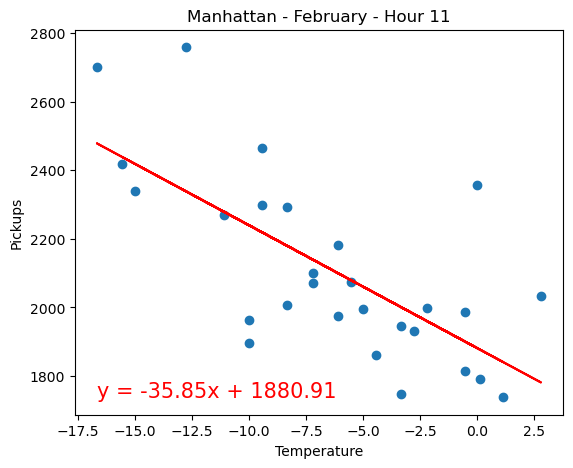

In [46]:
# Filter data for January in the Manhattan at 24 hour 

data = df[(df['month'] == 'February') & (df['borough'] == 'Manhattan') & (df['hour'] == 11)]
pickups = data['pickups']
variable_data = data['Temperature']

# Calculate the correlation (r-value) between 'pickups' and the current variable
correlation = st.pearsonr(variable_data, pickups)
    
# Print the correlation coefficient, rounded to two decimal places
print(f"The correlation (r-value) between pickups and the Temperature is {round(correlation[0], 2)}")
    
# Create a new matplotlib figure with a specified size
plt.figure(figsize=(6.3, 5))
    
# Perform linear regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(variable_data, pickups)
    
# Calculate the values predicted by the linear regression model
regress_values = (variable_data * slope + intercept)
    
# Create a string representing the equation of the regression line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
# Create a scatter plot of the current variable against 'pickups'
plt.scatter(variable_data, pickups)
    
# Plot the regression line in red
plt.plot(variable_data, regress_values, "r-")
    
# Annotate the plot with the regression equation
plt.annotate(line_eq, (min(variable_data), min(pickups)), fontsize=15, color="red")
    
# Set labels for the y-axis and x-axis
plt.xlabel('Temperature')
plt.ylabel("Pickups")
plt.title(f"Manhattan - February - Hour 11")
    
# Print the r-squared value (coefficient of determination), rounded to two decimal places
print(f"The r-squared is: {round(rvalue**2, 2)}")

# Display the plots
plt.show()


The correlation (r-value) between pickups and the Temperature is 0.43
The r-squared is: 0.19


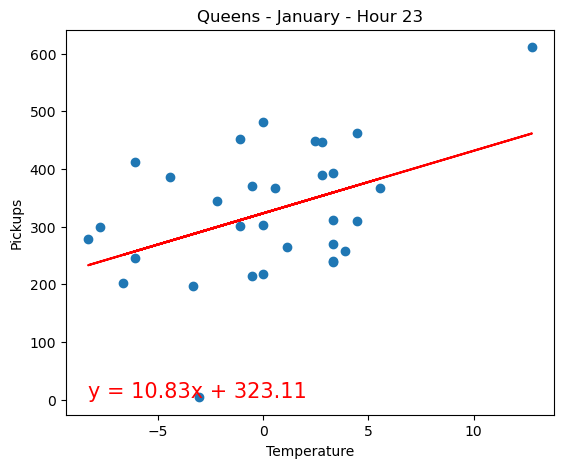

In [47]:
# Filter data for January in the Manhattan at 24 hour 

data = df[(df['month'] == 'January') & (df['borough'] == 'Queens') & (df['hour'] == 23)]
pickups = data['pickups']
variable_data = data['Temperature']

# Calculate the correlation (r-value) between 'pickups' and the current variable
correlation = st.pearsonr(variable_data, pickups)
    
# Print the correlation coefficient, rounded to two decimal places
print(f"The correlation (r-value) between pickups and the Temperature is {round(correlation[0], 2)}")
    
# Create a new matplotlib figure with a specified size
plt.figure(figsize=(6.3, 5))
    
# Perform linear regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(variable_data, pickups)
    
# Calculate the values predicted by the linear regression model
regress_values = (variable_data * slope + intercept)
    
# Create a string representing the equation of the regression line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
# Create a scatter plot of the current variable against 'pickups'
plt.scatter(variable_data, pickups)
    
# Plot the regression line in red
plt.plot(variable_data, regress_values, "r-")
    
# Annotate the plot with the regression equation
plt.annotate(line_eq, (min(variable_data), min(pickups)), fontsize=15, color="red")
    
# Set labels for the y-axis and x-axis
plt.xlabel('Temperature')
plt.ylabel("Pickups")

plt.title(f"Queens - January - Hour 23")
    
# Print the r-squared value (coefficient of determination), rounded to two decimal places
print(f"The r-squared is: {round(rvalue**2, 2)}")

# Display the plots

plt.show()


  

The correlation (r-value) between pickups and the Temperature is -0.3
The r-squared is: 0.09


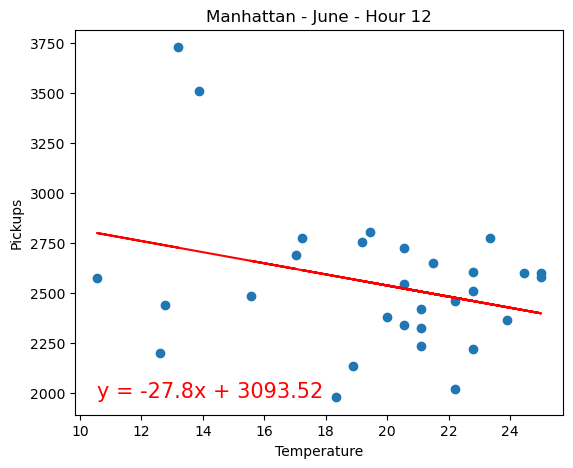

In [48]:
# Filter data for January in the Manhattan at 24 hour 

data = df[(df['month'] == 'June') & (df['borough'] == 'Manhattan') & (df['hour'] == 12)]
pickups = data['pickups']
variable_data = data['Temperature']

# Calculate the correlation (r-value) between 'pickups' and the current variable
correlation = st.pearsonr(variable_data, pickups)
    
# Print the correlation coefficient, rounded to two decimal places
print(f"The correlation (r-value) between pickups and the Temperature is {round(correlation[0], 2)}")
    
# Create a new matplotlib figure with a specified size
plt.figure(figsize=(6.3, 5))
    
# Perform linear regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(variable_data, pickups)
    
# Calculate the values predicted by the linear regression model
regress_values = (variable_data * slope + intercept)
    
# Create a string representing the equation of the regression line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
# Create a scatter plot of the current variable against 'pickups'
plt.scatter(variable_data, pickups)
    
# Plot the regression line in red
plt.plot(variable_data, regress_values, "r-")
    
# Annotate the plot with the regression equation
plt.annotate(line_eq, (min(variable_data), min(pickups)), fontsize=15, color="red")
    
# Set labels for the y-axis and x-axis
plt.xlabel('Temperature')
plt.ylabel("Pickups")

plt.title(f"Manhattan - June - Hour 12")
    
# Print the r-squared value (coefficient of determination), rounded to two decimal places
print(f"The r-squared is: {round(rvalue**2, 2)}")

# Display the plots

plt.show()


  

The correlation (r-value) between pickups and the Temperature is -0.23
The r-squared is: 0.05


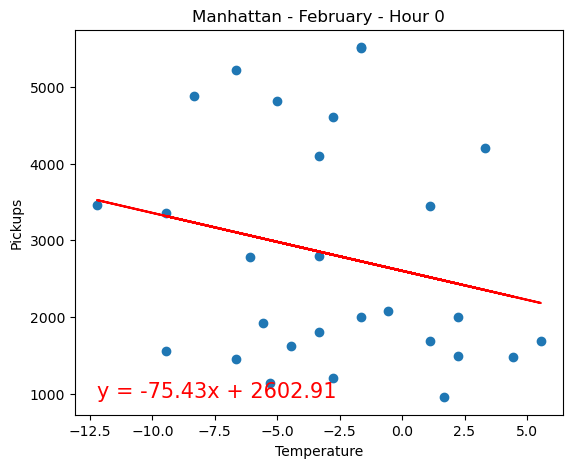

The correlation (r-value) between pickups and the Temperature is -0.16
The r-squared is: 0.03


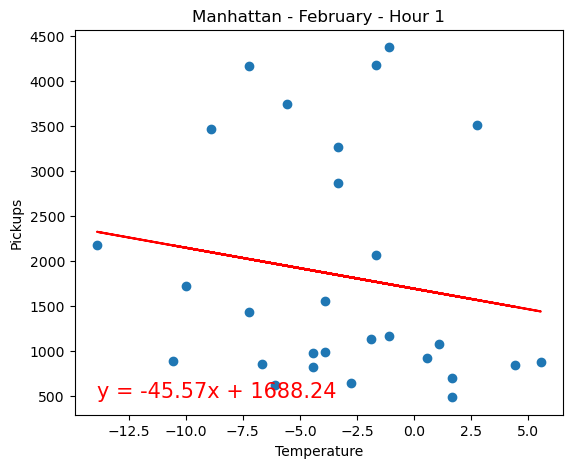

The correlation (r-value) between pickups and the Temperature is -0.13
The r-squared is: 0.02


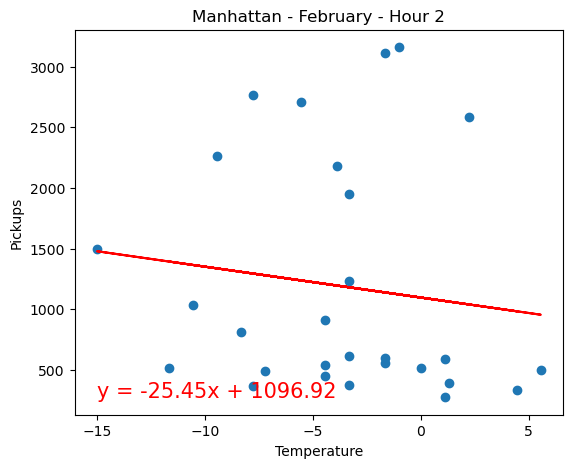

The correlation (r-value) between pickups and the Temperature is -0.09
The r-squared is: 0.01


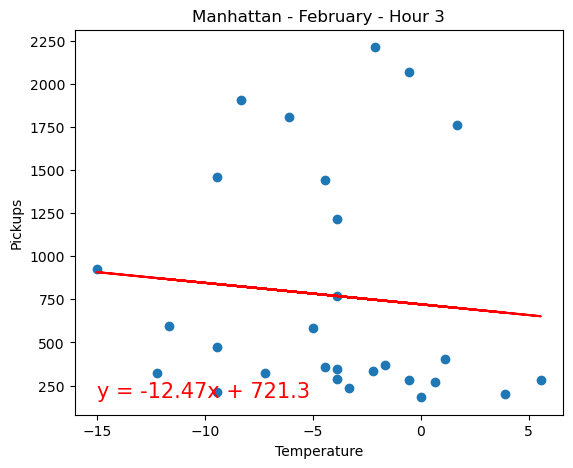

The correlation (r-value) between pickups and the Temperature is -0.1
The r-squared is: 0.01


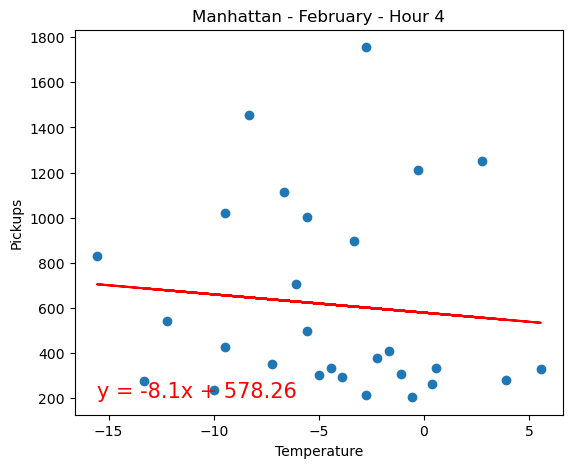

The correlation (r-value) between pickups and the Temperature is -0.19
The r-squared is: 0.04


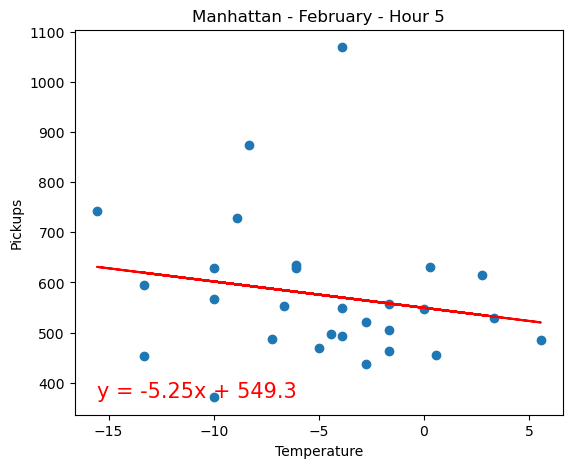

The correlation (r-value) between pickups and the Temperature is -0.15
The r-squared is: 0.02


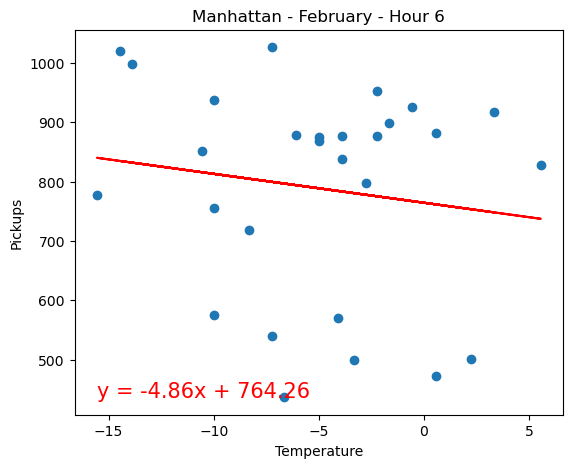

The correlation (r-value) between pickups and the Temperature is -0.04
The r-squared is: 0.0


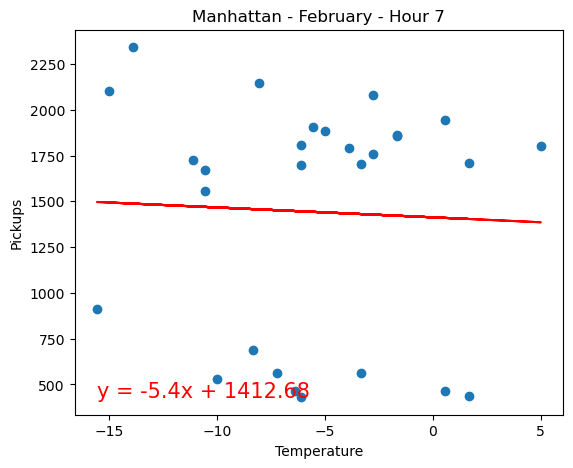

The correlation (r-value) between pickups and the Temperature is -0.08
The r-squared is: 0.01


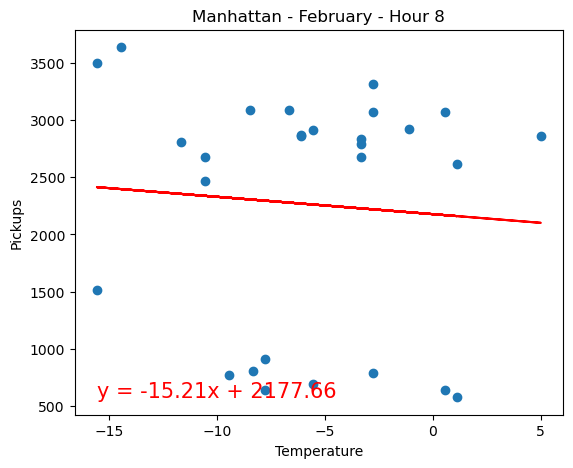

The correlation (r-value) between pickups and the Temperature is -0.14
The r-squared is: 0.02


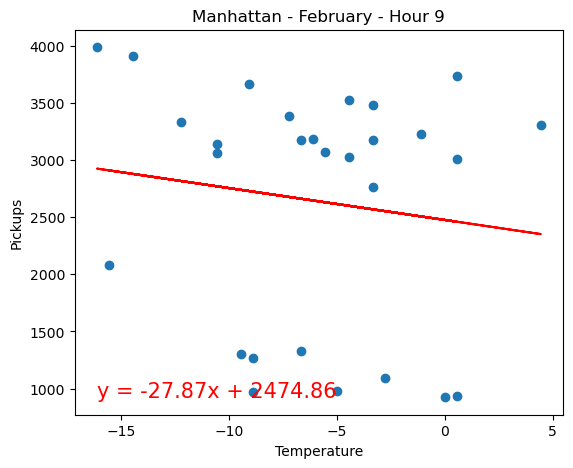

The correlation (r-value) between pickups and the Temperature is -0.38
The r-squared is: 0.14


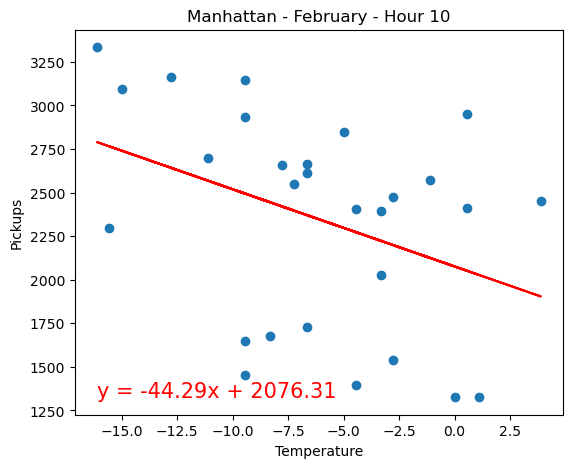

The correlation (r-value) between pickups and the Temperature is -0.7
The r-squared is: 0.48


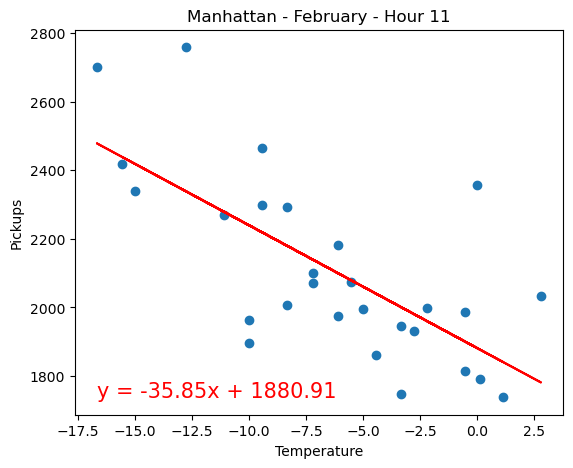

The correlation (r-value) between pickups and the Temperature is -0.67
The r-squared is: 0.45


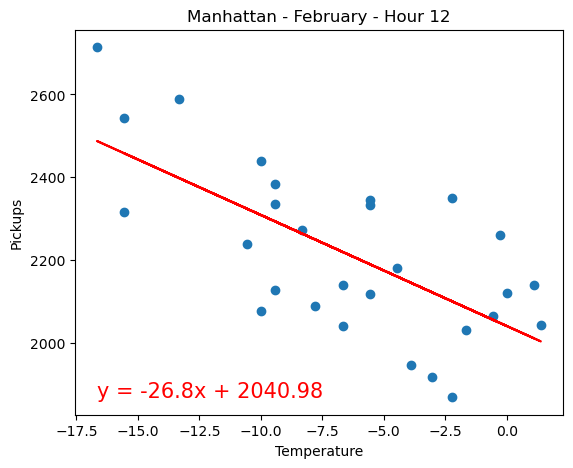

The correlation (r-value) between pickups and the Temperature is -0.43
The r-squared is: 0.19


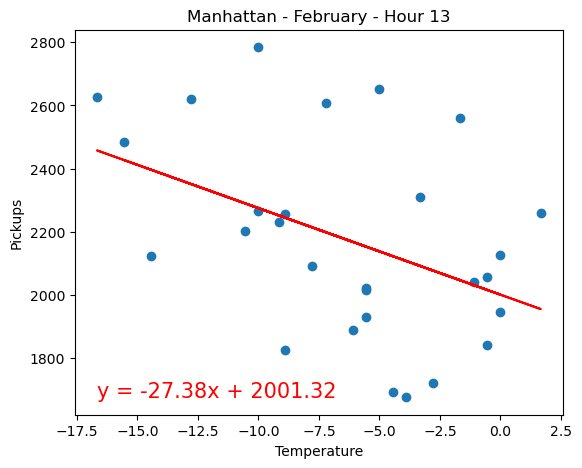

The correlation (r-value) between pickups and the Temperature is -0.38
The r-squared is: 0.15


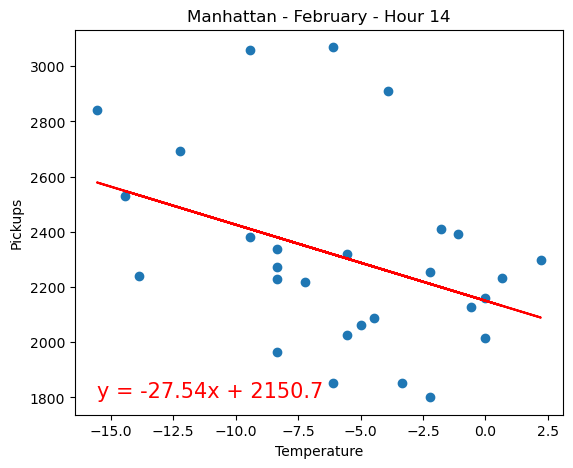

The correlation (r-value) between pickups and the Temperature is -0.41
The r-squared is: 0.17


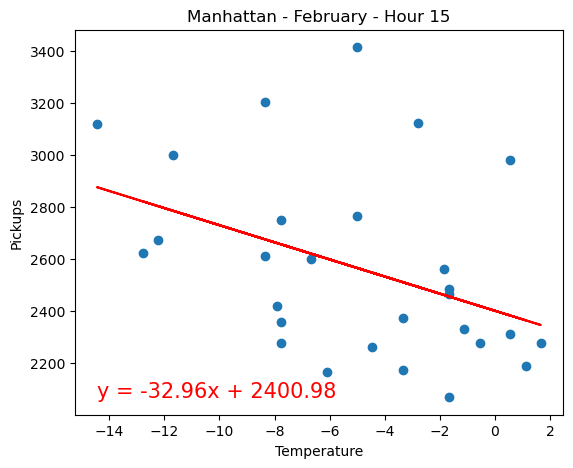

The correlation (r-value) between pickups and the Temperature is -0.43
The r-squared is: 0.19


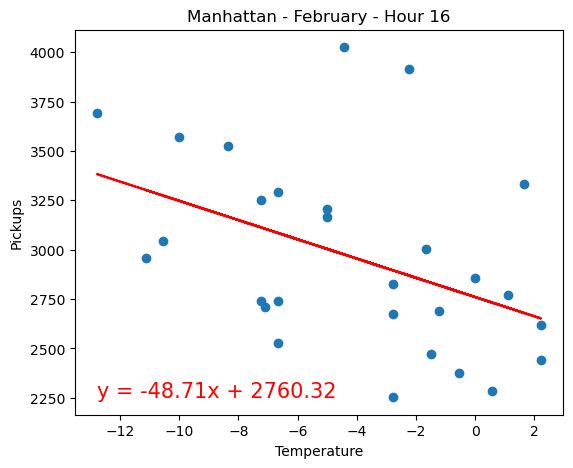

The correlation (r-value) between pickups and the Temperature is -0.43
The r-squared is: 0.18


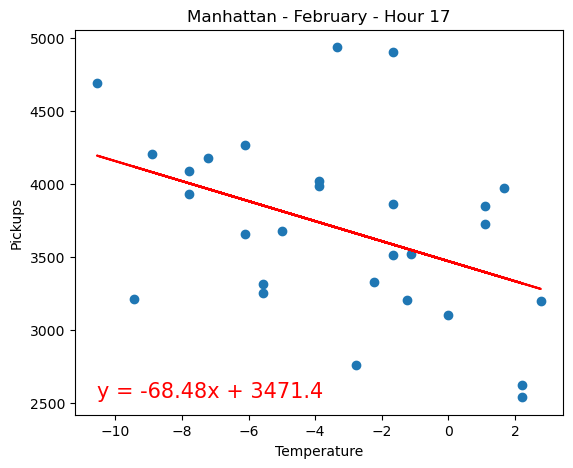

The correlation (r-value) between pickups and the Temperature is -0.42
The r-squared is: 0.17


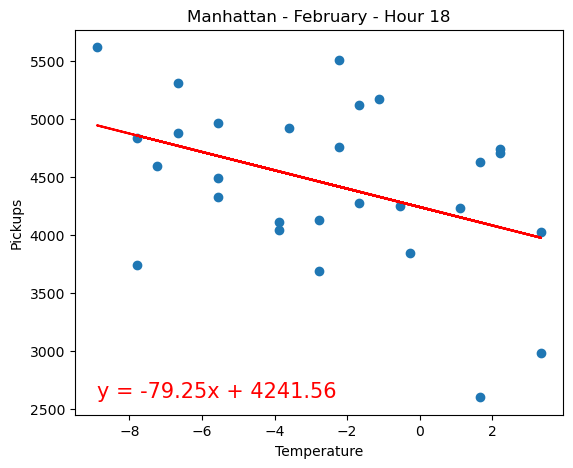

The correlation (r-value) between pickups and the Temperature is -0.48
The r-squared is: 0.23


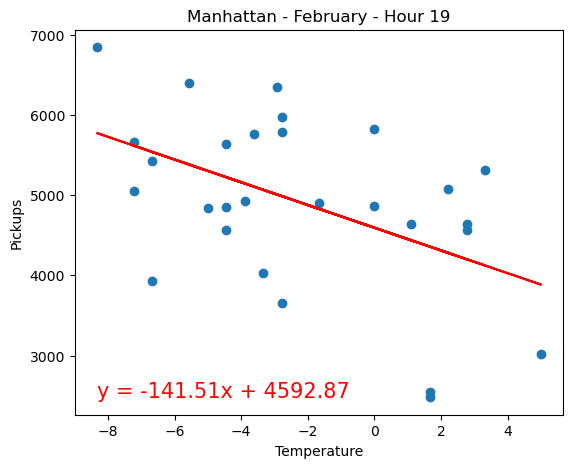

The correlation (r-value) between pickups and the Temperature is -0.45
The r-squared is: 0.21


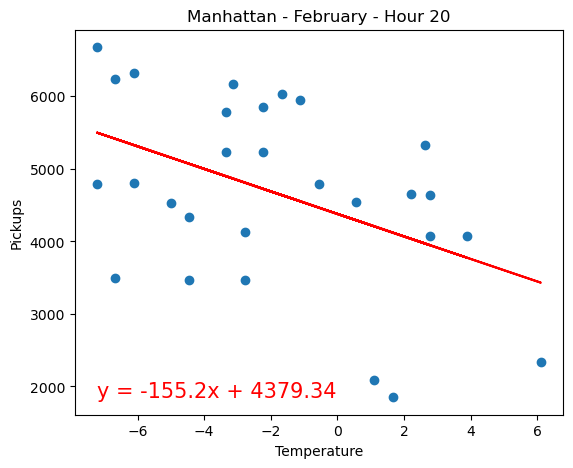

The correlation (r-value) between pickups and the Temperature is -0.44
The r-squared is: 0.2


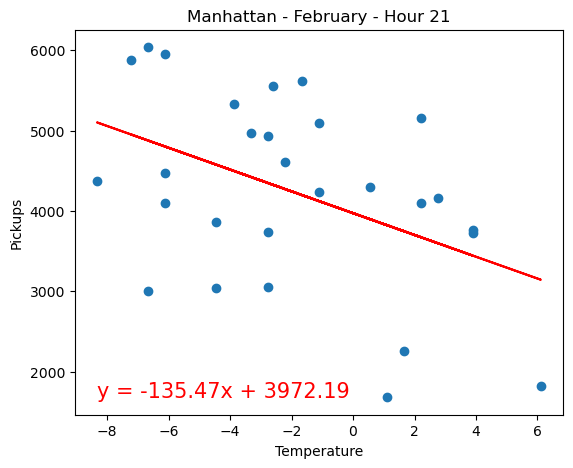

The correlation (r-value) between pickups and the Temperature is -0.33
The r-squared is: 0.11


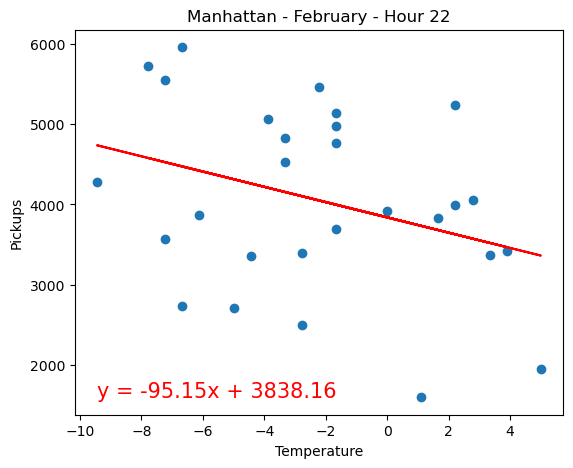

The correlation (r-value) between pickups and the Temperature is -0.21
The r-squared is: 0.05


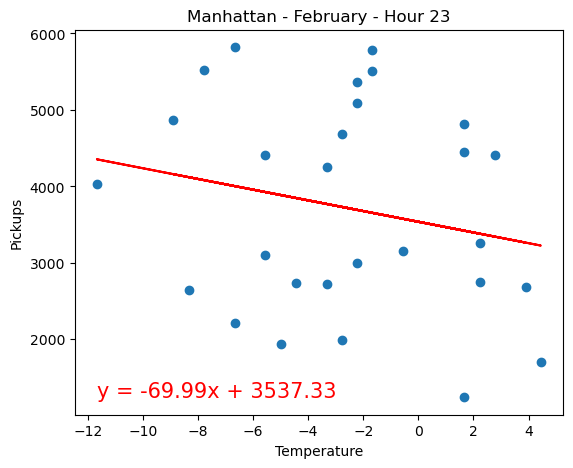

In [49]:
# Filter data for January in the Manhattan at 24 hour 
for x in range(24):
    Manhattan_jan = df[(df['month'] == 'February') & (df['borough'] == 'Manhattan') & (df['hour'] == x)]
    pickups = Manhattan_jan['pickups']
    variable_data = Manhattan_jan['Temperature']

    # Calculate the correlation (r-value) between 'pickups' and the current variable
    correlation = st.pearsonr(variable_data, pickups)
    
    # Print the correlation coefficient, rounded to two decimal places
    print(f"The correlation (r-value) between pickups and the Temperature is {round(correlation[0], 2)}")
    
    # Create a new matplotlib figure with a specified size
    plt.figure(figsize=(6.3, 5))
    
    # Perform linear regression analysis
    (slope, intercept, rvalue, pvalue, stderr) = linregress(variable_data, pickups)
    
    # Calculate the values predicted by the linear regression model
    regress_values = (variable_data * slope + intercept)
    
    # Create a string representing the equation of the regression line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot of the current variable against 'pickups'
    plt.scatter(variable_data, pickups)
    
    # Plot the regression line in red
    plt.plot(variable_data, regress_values, "r-")
    
    # Annotate the plot with the regression equation
    plt.annotate(line_eq, (min(variable_data), min(pickups)), fontsize=15, color="red")
    
    # Set labels for the y-axis and x-axis
    plt.xlabel('Temperature')
    plt.ylabel("Pickups")

    plt.title(f"Manhattan - February - Hour {x}")
    
    # Print the r-squared value (coefficient of determination), rounded to two decimal places
    print(f"The r-squared is: {round(rvalue**2, 2)}")

    # Display the plots

    plt.show()


  

The correlation (r-value) between pickups and the Temperature is -0.22
The r-squared is: 0.05


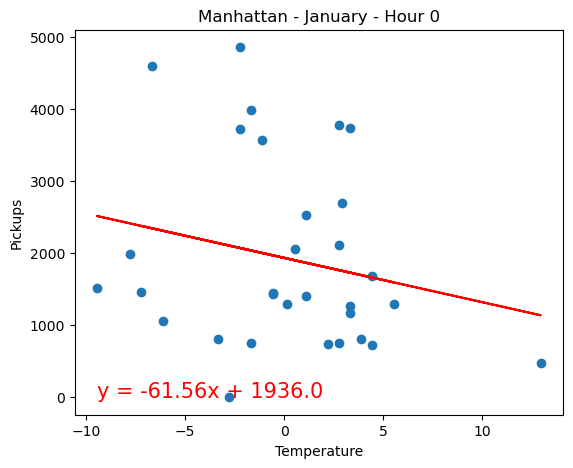

The correlation (r-value) between pickups and the Temperature is -0.15
The r-squared is: 0.02


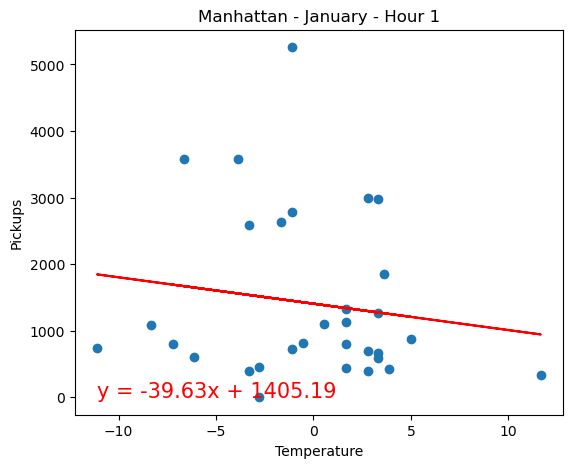

The correlation (r-value) between pickups and the Temperature is -0.1
The r-squared is: 0.01


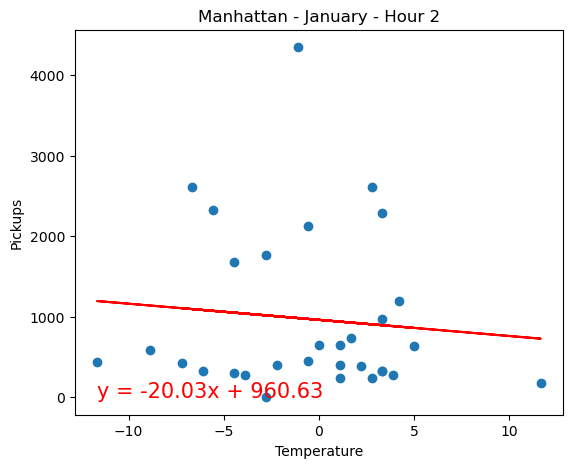

The correlation (r-value) between pickups and the Temperature is -0.04
The r-squared is: 0.0


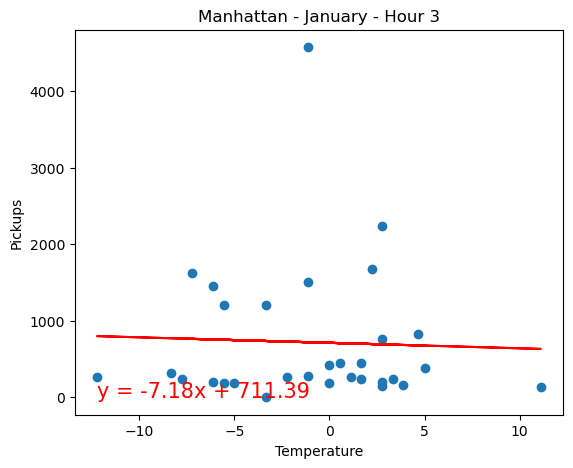

The correlation (r-value) between pickups and the Temperature is 0.01
The r-squared is: 0.0


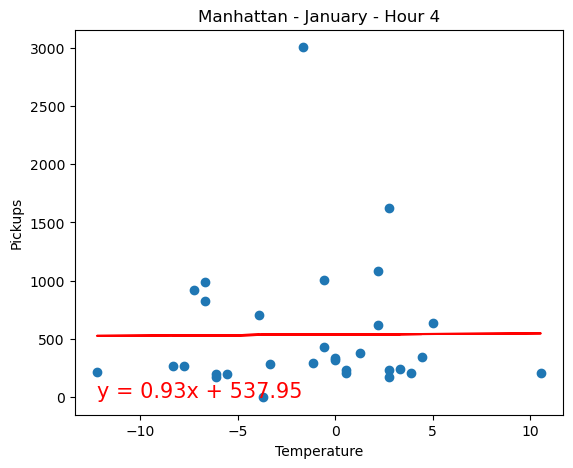

The correlation (r-value) between pickups and the Temperature is 0.05
The r-squared is: 0.0


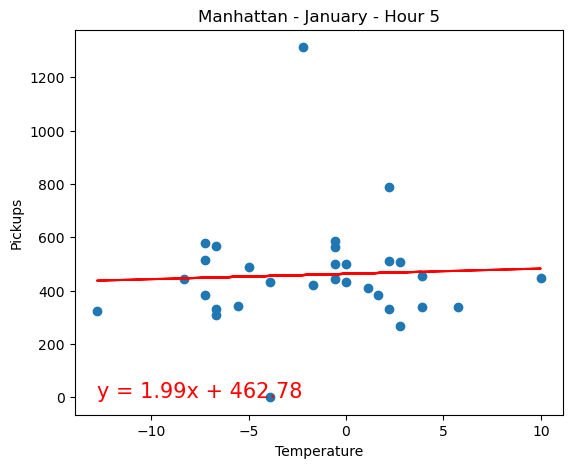

The correlation (r-value) between pickups and the Temperature is -0.07
The r-squared is: 0.0


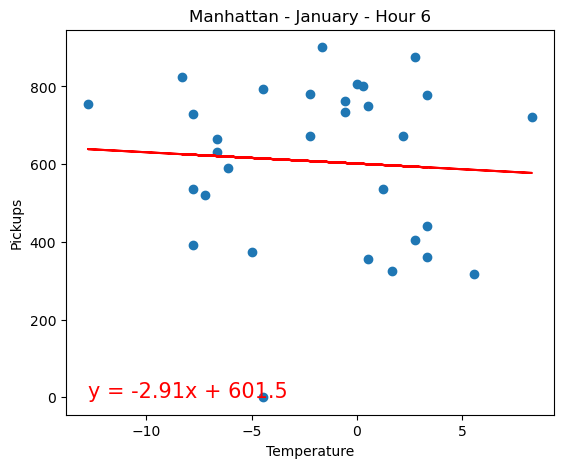

The correlation (r-value) between pickups and the Temperature is -0.17
The r-squared is: 0.03


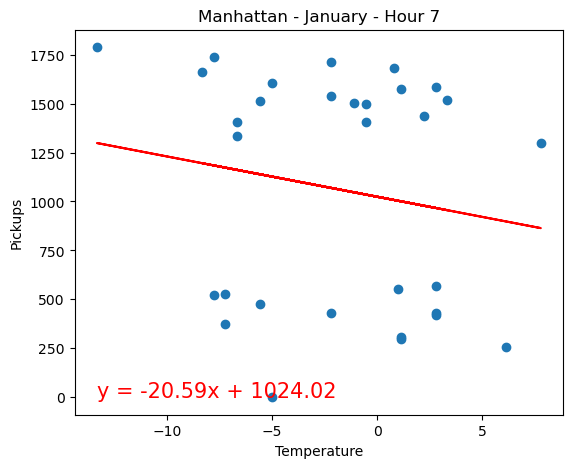

The correlation (r-value) between pickups and the Temperature is -0.15
The r-squared is: 0.02


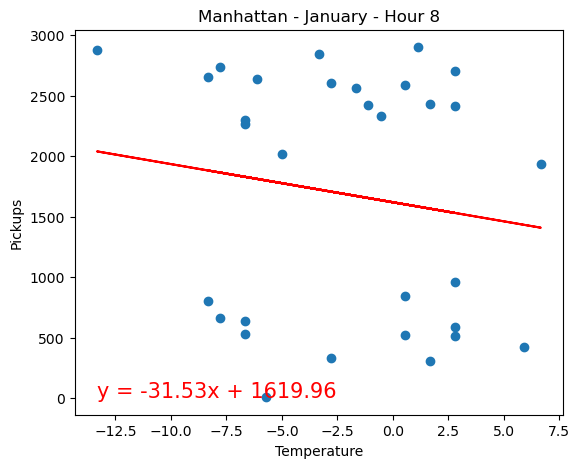

The correlation (r-value) between pickups and the Temperature is -0.18
The r-squared is: 0.03


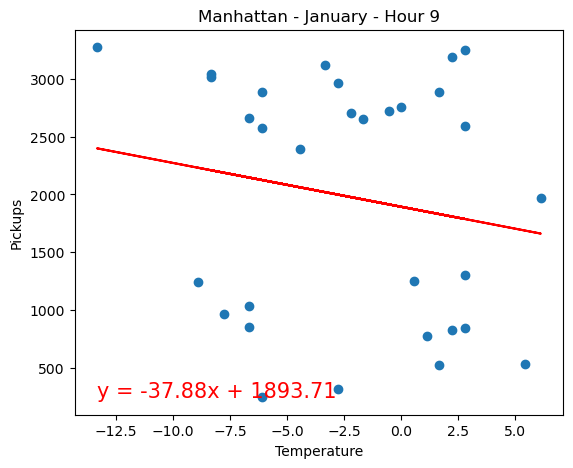

The correlation (r-value) between pickups and the Temperature is -0.29
The r-squared is: 0.08


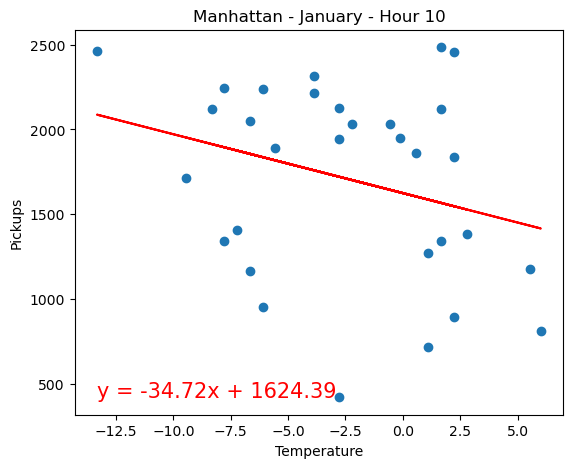

The correlation (r-value) between pickups and the Temperature is -0.32
The r-squared is: 0.1


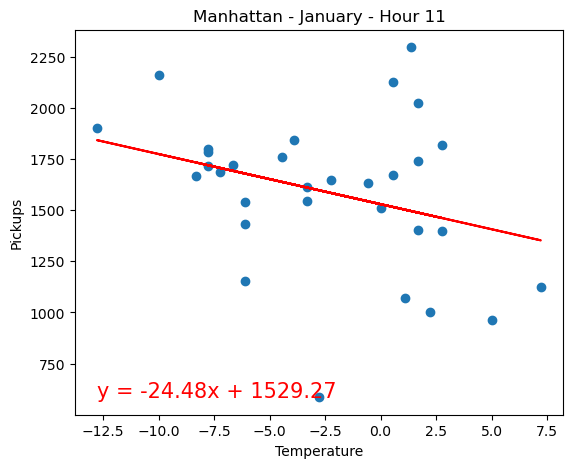

The correlation (r-value) between pickups and the Temperature is -0.22
The r-squared is: 0.05


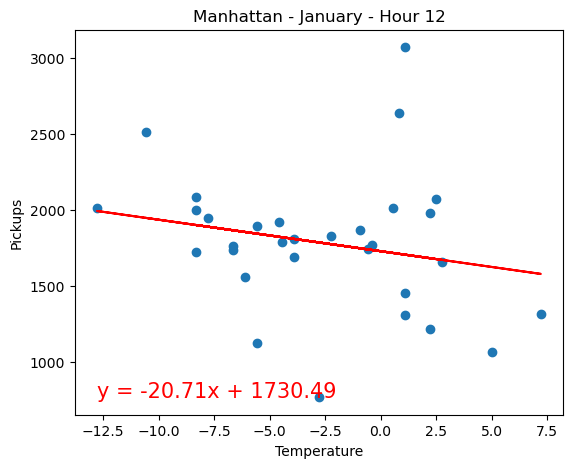

The correlation (r-value) between pickups and the Temperature is -0.14
The r-squared is: 0.02


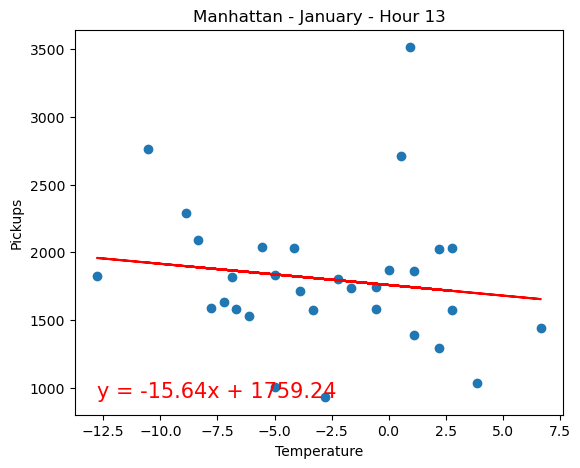

The correlation (r-value) between pickups and the Temperature is -0.15
The r-squared is: 0.02


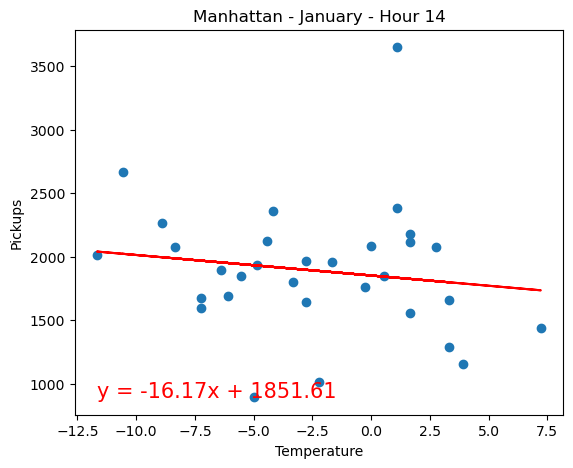

The correlation (r-value) between pickups and the Temperature is -0.2
The r-squared is: 0.04


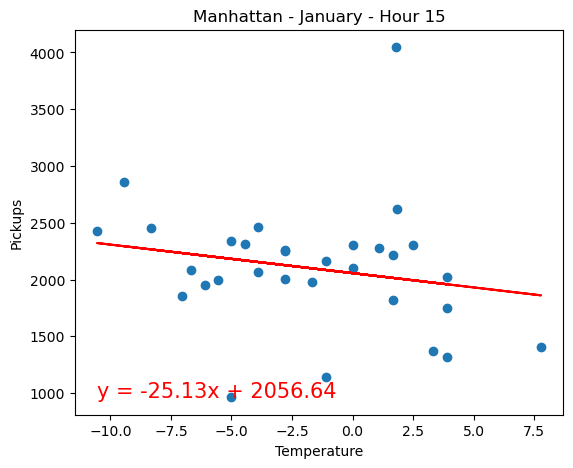

The correlation (r-value) between pickups and the Temperature is -0.26
The r-squared is: 0.07


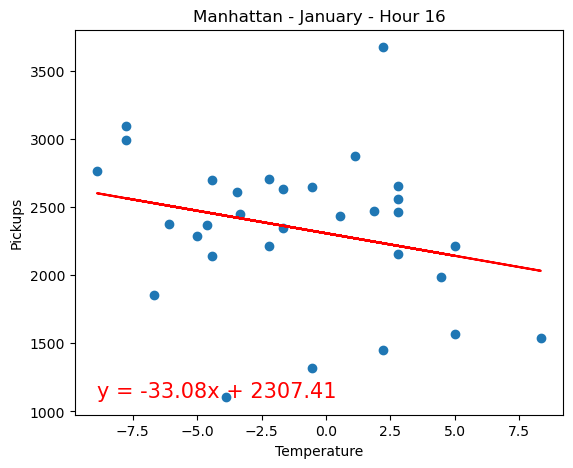

The correlation (r-value) between pickups and the Temperature is -0.39
The r-squared is: 0.15


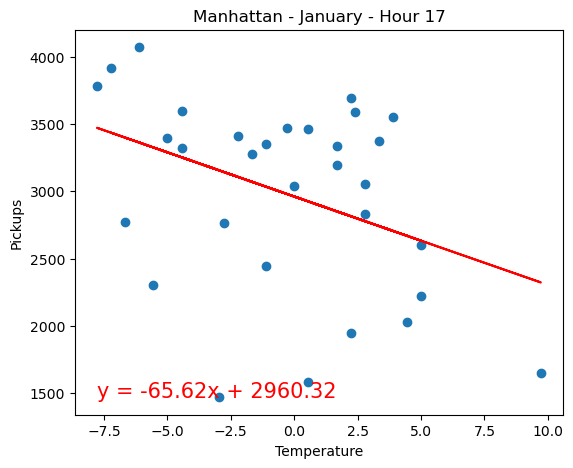

The correlation (r-value) between pickups and the Temperature is -0.35
The r-squared is: 0.12


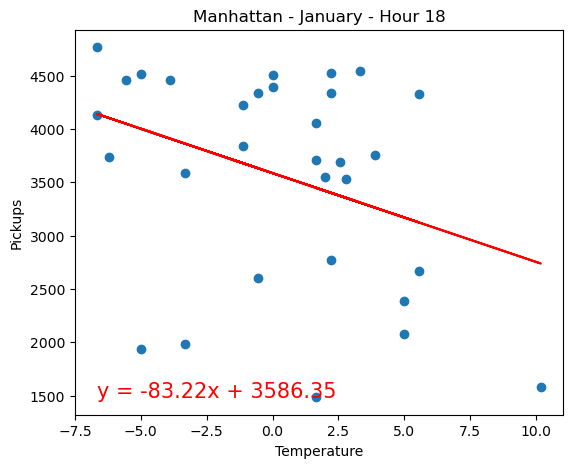

The correlation (r-value) between pickups and the Temperature is -0.31
The r-squared is: 0.1


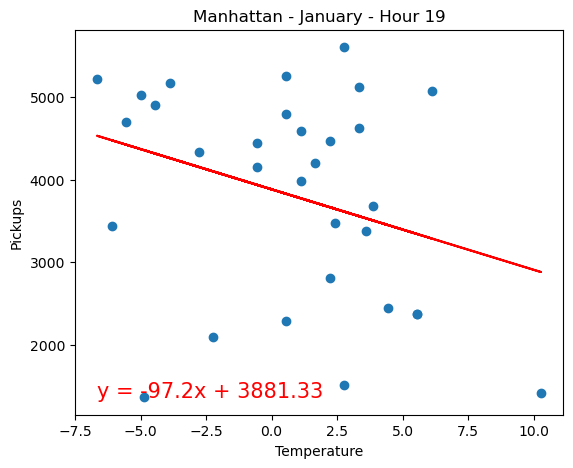

The correlation (r-value) between pickups and the Temperature is -0.35
The r-squared is: 0.12


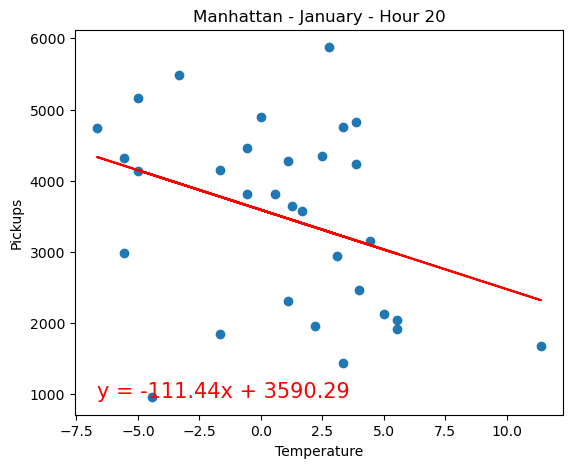

The correlation (r-value) between pickups and the Temperature is -0.41
The r-squared is: 0.17


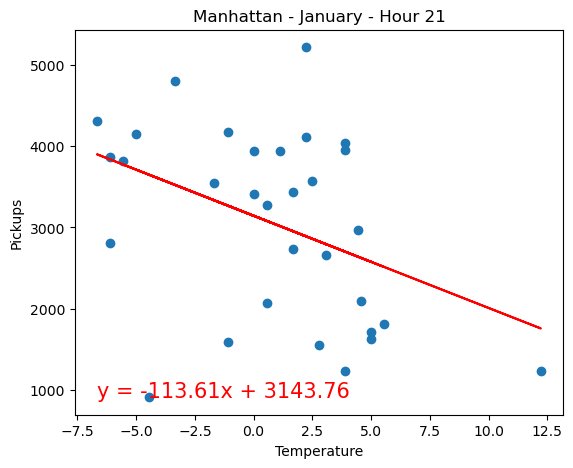

The correlation (r-value) between pickups and the Temperature is -0.41
The r-squared is: 0.17


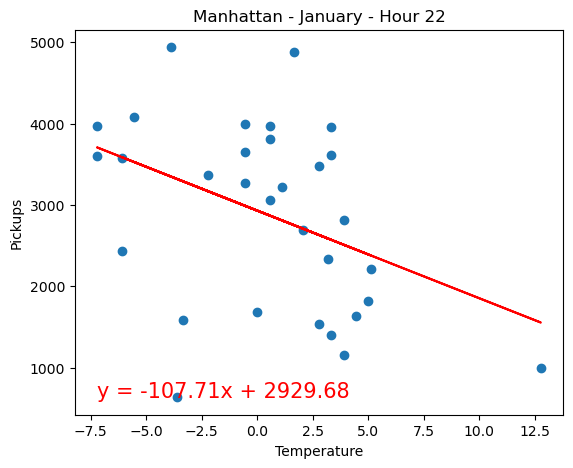

The correlation (r-value) between pickups and the Temperature is -0.33
The r-squared is: 0.11


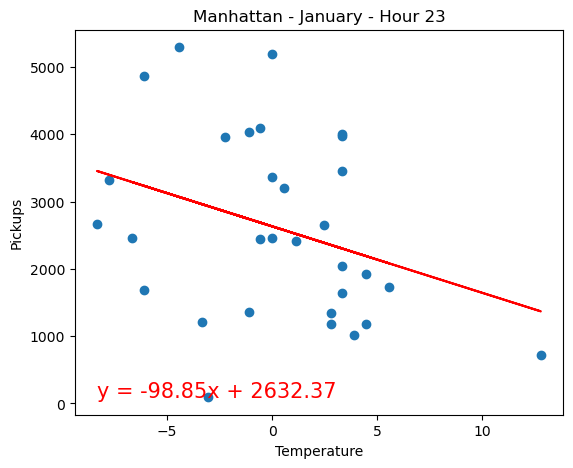

In [50]:
# Filter data for January in the Manhattan at 24 hour 
for x in range(24):
    data = df[(df['month'] == 'January') & (df['borough'] == 'Manhattan') & (df['hour'] == x)]
    pickups = data['pickups']
    variable_data = data['Temperature']

    # Calculate the correlation (r-value) between 'pickups' and the current variable
    correlation = st.pearsonr(variable_data, pickups)
    
    # Print the correlation coefficient, rounded to two decimal places
    print(f"The correlation (r-value) between pickups and the Temperature is {round(correlation[0], 2)}")
    
    # Create a new matplotlib figure with a specified size
    plt.figure(figsize=(6.3, 5))
    
    # Perform linear regression analysis
    (slope, intercept, rvalue, pvalue, stderr) = linregress(variable_data, pickups)
    
    # Calculate the values predicted by the linear regression model
    regress_values = (variable_data * slope + intercept)
    
    # Create a string representing the equation of the regression line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot of the current variable against 'pickups'
    plt.scatter(variable_data, pickups)
    
    # Plot the regression line in red
    plt.plot(variable_data, regress_values, "r-")
    
    # Annotate the plot with the regression equation
    plt.annotate(line_eq, (min(variable_data), min(pickups)), fontsize=15, color="red")
    
    # Set labels for the y-axis and x-axis
    plt.xlabel('Temperature')
    plt.ylabel("Pickups")

    plt.title(f"Manhattan - January - Hour {x}")
    
    # Print the r-squared value (coefficient of determination), rounded to two decimal places
    print(f"The r-squared is: {round(rvalue**2, 2)}")

    # Display the plots

    plt.show()


  